<h1>Web scraping, Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


### Project overview

In this notebook, I demonstrate how to collect, clean, and visualize financial data from both APIs and web pages.  
The workflow covers:

- Using the `yfinance` library to download historical stock data for Apple and GameStop.
- Using `requests` and `BeautifulSoup` to scrape historical price and revenue tables from HTML pages (e.g., Amazon and GameStop).
- Cleaning scraped data with `pandas` (parsing dates, removing currency symbols, handling missing values).
- Building a reusable `make_graph` function to plot stock price and revenue over time on a simple dashboard-style figure.

This project is meant to showcase my practical skills in web scraping, data wrangling, and basic data visualization in Python.


In [ ]:
!pip install yfinance
!pip install bs4
!pip install matplotlib

In [2]:
#Import useful libraries

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. Filterwarnings function is used to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

 ## 1) Extracting Apple stock Data using a Python Library, yfinance


Using the Ticker module we can create an object that will allow us to access functions to extract data. 
The stock here is Apple and its ticker symbol is `AAPL`.


In [4]:
aapl = yf.Ticker('AAPL')

Extracting stock information using the ticker object and the function `history`  and saving it in a dataframe named `apple_data`. Setting the `period` parameter to ` "10 year" ` so that we get information for the last 10 years of data.


In [5]:
apple_data = aapl.history(period = 'max')

**Reset the index** using the `reset_index(inplace=True)` function on the apple_data DataFrame and display the first five rows of the `apple_data` dataframe using the `head` function. 


In [6]:
apple_data.reset_index(inplace=True)
apple_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098389,0.098817,0.098389,0.098389,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.093684,0.093684,0.093256,0.093256,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.086839,0.086839,0.086412,0.086412,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088550,0.088978,0.088550,0.088550,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091118,0.091545,0.091118,0.091118,73449600,0.0,0.0


## 2: Extracting Apple stock data using Webscraping 

In [7]:
import json

url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"


In [8]:
response = requests.get(url)
apple_info = json.loads(response.text)
type(apple_info)
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [9]:
apple_info['country']

'United States'

## 2: Extracting Amazon stock data using Webscrapping

In [10]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

html_data  = requests.get(url).text


In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')

In [12]:
soup.find('title')                                  #Content of the title attribute

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

2a: Extracting the table using BeautifulSoup with historical share prices and storing it into a data frame named amazon_data. The data frame have columns Date, Open, High, Low, Close, Adj Close, and Volume.

In [13]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = pd.concat([amazon_data, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)

In [14]:
amazon_data.head()                              #Printing first 5 rows of the dataframe

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


2b: Extracting the table using pandas build in function read_html

In [ ]:
!pip install lxml
read_html_pandas_data = pd.read_html(str(soup))

amazon_dataframe = read_html_pandas_data[0]
amazon_dataframe.head()

## 3: Extracting GME stock Data using a Python Library, yfinance


This time, we want to extract data from the stock GameStop using the `Ticker` function. Its ticker symbol is `GME`.


In [17]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history`, extracting stock information and saving it in a dataframe named `gme_data`. The `period` parameter is ` "max" ` so we get information for the maximum amount of time.


In [18]:
gme_data = gme.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. 


In [19]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 4: Extracting GME Revenue Data using webscrapping


Using the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Saving the text of the response as a variable named `html_data`


In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url).text

Parsing the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')
print(soup)

Extracting the table `GameStop Revenue` from the html data using read_html function in pandas and storing it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. 


In [23]:
gme_revenue= pd.read_html(str(soup))[1]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


Removing the comma and dollar sign, a null or empty strings from the Revenue column.


In [24]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)                    
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Sneha Gupta\AppData\Local\Temp\ipykernel_3120\1093290693.py:1: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)


Displaying the last five rows of the `gme_revenue` dataframe using the `tail` function. 


In [25]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## 5: Plot GameStop Stock Graph


## Defining Graph Function

Using the `make_graph` function to plot the GameStop Stock Data, also provide a title for the graph.


The function `make_graph` takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**

In [26]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']                     # Conditional formatting
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']               # Conditional formatting

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

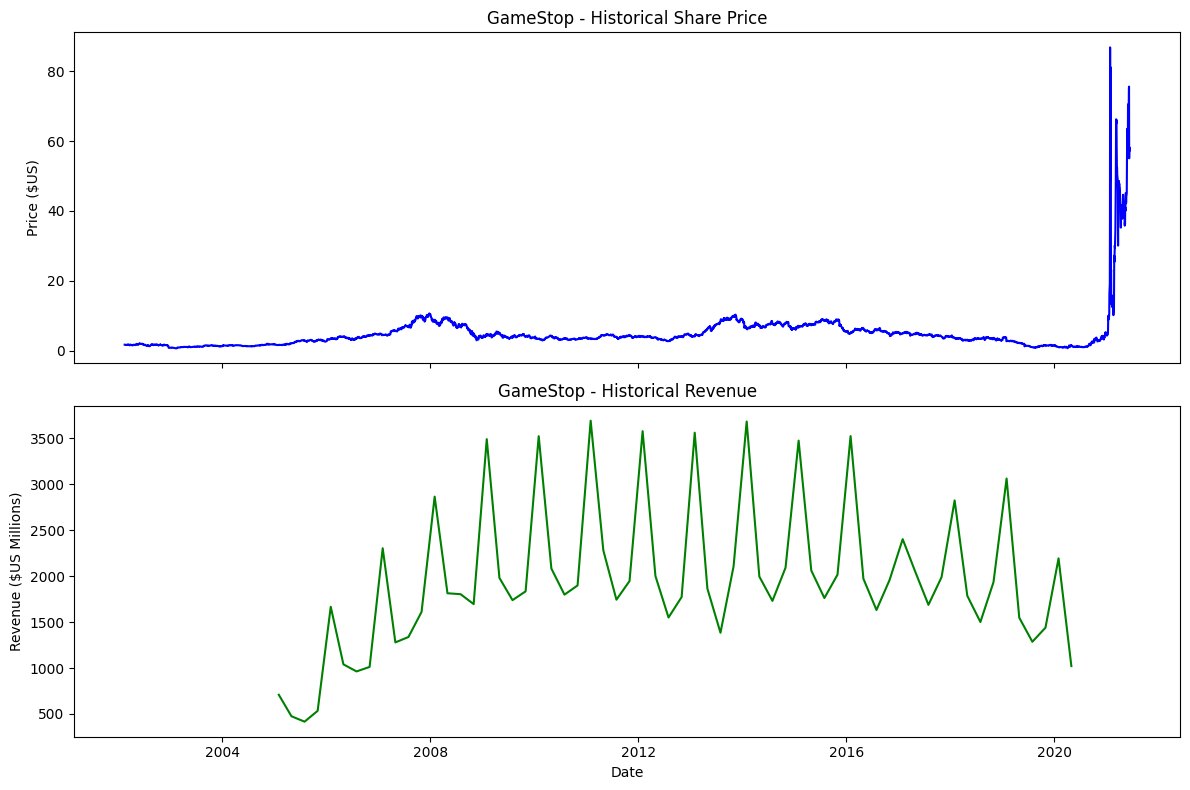

In [27]:
make_graph(gme_data, gme_revenue, 'GameStop')

## Conclusion

In this mini-project I brought together several key steps of a typical data workflow:

- **Data access** – pulled structured stock data from `yfinance` and scraped HTML tables using `requests`, `BeautifulSoup`, and `pandas.read_html`.
- **Data cleaning** – converted dates to proper `datetime` objects, stripped currency symbols and commas from revenue values, and handled empty or missing rows using pandas.
- **Visualization** – created a reusable plotting function that combines stock price and revenue on a single dashboard using Matplotlib, making it easy to compare market behavior with company fundamentals.
